In [2]:
import numpy as np
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', font_scale=1.25)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)
import joypy

INFO:numexpr.utils:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [3]:
import h5py
import logging
import numpy as np
import pandas as pd
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
from scipy.sparse import csr_matrix, dia_matrix, triu, tril, coo_matrix
import scipy.stats as stats
import os.path

In [44]:
import pandas as pd
import seaborn as sns
df_list = []
contacts_path = f'/sonas-hs/gillis/hpc/data/nfox/hi_c_data_processing/data_human/stats/'
df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])
proj_l = ['aggregates'] + df_con['id'].tolist()
proj_l = ['aggregates']
#proj_l = ['aggregates'] 
counter = 0
for proj_name in proj_l:
    counter = counter +1
    #for dist in [0, 200000, 400000, 600000, 800000]:
    for dist in [0]:
    #for dist in [300000]:
    #for dist in [800000]:
    #for dist in [600000]:

      i_max = 1200000
    #for dist in [100000]:
      #for auc_cut in [0.1, 0.2,  0.4, 0.5, 0.6, 0.8, 2]:
      #for resolution in ['5kbp_raw', '10kbp_raw', '25kbp_raw', '40kbp_raw', '100kbp_raw', '250kbp_raw']:
      for resolution in ['1kbp_raw']:
        for pred_type in ['prediction']:
            #for tissue in ['Whole_Blood', 'Muscle_Skeletal']:
            for tissue in ['all']:

                for i in (list(range(1, 23))):
                #for i in (list(range(1, 7))):


                    try:
                        #df_b = pd.read_csv(f"/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/tads/chr{i}_intra_KR_min30000_max1000000_step10000_thres0.05_delta0.01_fdr_boundaries.bed", sep='\t', names=['chrom', 'start', 'end', 'b_name', 'score', 'ex'])
                        #df_b['bin_start'] = [int(x/10000) for x in df_b['start']]
                        #df_b['bin_end'] = [int(x/10000) for x in df_b['end']]
                        #boundary_bins = df_b['bin_start'].tolist() + df_b['bin_end'].tolist() 

                        #df = pd.read_csv(f"/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/rao_GSE63525_GM12878_combined/10kbp_raw/gtex_scores_per_snp/chr{i}_{dist}_gtex_{pred_type}_{tissue}_kept_dup_200KB.csv", sep='\t')
                        #df = pd.read_csv(f"/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/{proj_name}/10kbp_raw/gtex_scores_per_snp/chr{i}_{dist}_gtex_1_all.csv", sep='\t')
                        df = pd.read_csv(f"/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/{proj_name}/{resolution}/gtex_scores_per_snp/chr{i}_{dist}_{i_max}_gtex_1_all_optimized.csv", sep='\t')
                        df['pred_type'] = pred_type
                        df['dist'] = dist
                        #df['auc_cut'] = auc_cut
                        df['proj'] = proj_name
                        df['resolution'] = resolution
                        df['bin'] = [x.split('_')[1] for x in  df['gene']]

                        df['bin'] = df['bin'].astype(int)/1000

                        #df['bin'] = df['bin'].astype(int)/2

                        df['bin'] = df['bin'].astype('int')
                        #df.drop_duplicates(['bin', 'dist'], inplace=True)
                        df['resolution'] = int(dist/1000)
                        df.dropna()
                        

                        
                        #df = df[df['auc_tss'] < auc_cut]
                        #df['bin'] =  [int(int(x.split('_')[1])/10000) for x in df['gene']]

                        #df[df['auc_jac'] > 0.6].shape[0]/df.shape[0]

                        #df['boundary'] = [1 if x in boundary_bins else 0 for x in df['bin']]
                        df['tissue'] = tissue
                        #print (counter, i)
                        df_list.append(df)
                    except:
                        a = 3
                        
                        #print (counter, f"{proj_name}/10kbp_raw/gtex_scores_per_snp/{resolution}_chr{i}_{dist}_gtex_1_all.csv")
                        

In [45]:
df = pd.concat(df_list)

In [46]:
df

auc_tss    auc_KR                                            gene  \
0      0.830882  0.852941                           chr1_10017339_C_A_b38   
1      0.854545  0.890909                           chr1_10017435_C_T_b38   
2      0.714286  0.714286                          chr1_100179156_T_C_b38   
3      1.000000  1.000000                          chr1_100179332_G_A_b38   
4      0.714286  0.714286                          chr1_100179620_T_G_b38   
...         ...       ...                                             ...   
24167  0.938596  0.736842                          chr22_50753502_C_G_b38   
24168  0.964912  1.000000                          chr22_50753709_A_G_b38   
24169  0.963636  0.977273                          chr22_50802392_C_T_b38   
24170  0.796296  0.590278  chr22_50806958_C_CGTCTCTGCGCCGCCGGGGACGTGT_b38   
24171  0.705357  0.700893                          chr22_50807702_A_G_b38   

       total_variants  given_bin_start  total_genes  total_tp   pred_type  \
0              137580            10017           38         4  prediction   
1              137580            10017           38         5  prediction   
2              137580           100179           30         2  prediction   
3              137580           100179           30         1  prediction   
4              137580           100179           30         2  prediction   
...               ...              ...          ...       ...         ...   
24167           24172            50753           59         2  prediction   
24168           24172            50753           59         2  prediction   
24169           24172            50802           59         4  prediction   
24170           24172            50806           58         4  prediction   
24171           24172            50807           58         2  prediction   

       dist        proj  resolution     bin tissue  
0         0  aggregates           0   10017    all  
1         0  aggregates           0   10017    all  
2         0  aggregates           0  100179    all  
3         0  aggregates           0  100179    all  
4         0  aggregates           0  100179    all  
...     ...         ...         ...     ...    ...  
24167     0  aggregates           0   50753    all  
24168     0  aggregates           0   50753    all  
24169     0  aggregates           0   50802    all  
24170     0  aggregates           0   50806    all  
24171     0  aggregates           0   50807    all  

[1575098 rows x 13 columns]

In [54]:
df = df.dropna()

In [50]:
df_na_dropped['total_genes'].sum()

54220988

In [51]:
df_na_dropped['total_tp'].sum()

4319205

In [43]:
df

auc_tss    auc_KR                                            gene  \
0      0.830882  0.852941                           chr1_10017339_C_A_b38   
1      0.854545  0.890909                           chr1_10017435_C_T_b38   
2      0.714286  0.714286                          chr1_100179156_T_C_b38   
3      1.000000  1.000000                          chr1_100179332_G_A_b38   
4      0.714286  0.714286                          chr1_100179620_T_G_b38   
...         ...       ...                                             ...   
24167  0.938596  0.736842                          chr22_50753502_C_G_b38   
24168  0.964912  1.000000                          chr22_50753709_A_G_b38   
24169  0.963636  0.977273                          chr22_50802392_C_T_b38   
24170  0.796296  0.590278  chr22_50806958_C_CGTCTCTGCGCCGCCGGGGACGTGT_b38   
24171  0.705357  0.700893                          chr22_50807702_A_G_b38   

       total_variants  given_bin_start  total_genes  total_tp   pred_type  \
0              137580            10017           38         4  prediction   
1              137580            10017           38         5  prediction   
2              137580           100179           30         2  prediction   
3              137580           100179           30         1  prediction   
4              137580           100179           30         2  prediction   
...               ...              ...          ...       ...         ...   
24167           24172            50753           59         2  prediction   
24168           24172            50753           59         2  prediction   
24169           24172            50802           59         4  prediction   
24170           24172            50806           58         4  prediction   
24171           24172            50807           58         2  prediction   

       dist        proj  resolution     bin tissue      diff    chr  
0         0  aggregates           0   10017    all  0.022059   chr1  
1         0  aggregates           0   10017    all  0.036364   chr1  
2         0  aggregates           0  100179    all  0.000000   chr1  
3         0  aggregates           0  100179    all  0.000000   chr1  
4         0  aggregates           0  100179    all  0.000000   chr1  
...     ...         ...         ...     ...    ...       ...    ...  
24167     0  aggregates           0   50753    all -0.201754  chr22  
24168     0  aggregates           0   50753    all  0.035088  chr22  
24169     0  aggregates           0   50802    all  0.013636  chr22  
24170     0  aggregates           0   50806    all -0.206019  chr22  
24171     0  aggregates           0   50807    all -0.004464  chr22  

[1574194 rows x 15 columns]

In [53]:
234 / 23465 * 100

0.9972299168975068

In [42]:
df['dist'].min()

0

In [254]:
df_unique_variants_sig   = pd.read_csv(f'/grid/gillis/data/lohia/eQTL/GTEx_Analysis_v8_eQTL/sig_association.csv.gz', sep='\t' )

df_unique_variants_sig['tss_distance'] = df_unique_variants_sig['tss_distance'].abs()

df_unique_variants_sig = df_unique_variants_sig[df_unique_variants_sig['tss_distance'] > 800000]

df_unique_variants_sig['gene_id'] = [x.split('.')[0] for x in df_unique_variants_sig['gene_id']]

In [55]:
df['diff'] = df['auc_KR'] - df['auc_tss']

<ipython-input-55-d4cb6a4fbe12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'] = df['auc_KR'] - df['auc_tss']


In [56]:
df['chr'] = [x.split('_')[0] for x in df['gene']]

<ipython-input-56-89a8d09ad8c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chr'] = [x.split('_')[0] for x in df['gene']]


In [79]:
df_diff_1 = df[df['diff'] == 0.8]

In [71]:
df_diff_1 = df[df['auc_KR'] == 1]

In [73]:
df_diff_1 = df[df['diff'] >= 0.8]

In [78]:
df_diff_1[df_diff_1['chr'] == 'chr10']['total_genes'].median()

7.0

In [81]:
df_diff_1[df_diff_1['chr'] == 'chr10']

auc_tss    auc_KR                     gene  total_variants  \
19487  0.000000  0.800000   chr10_15501481_T_C_b38           84208   
34548  0.066667  0.866667   chr10_37594133_C_T_b38           84208   
34868  0.066667  0.866667   chr10_37664826_A_C_b38           84208   
39617  0.200000  1.000000   chr10_39254350_G_A_b38           84208   
39618  0.200000  1.000000   chr10_39254515_T_C_b38           84208   
39619  0.200000  1.000000   chr10_39254892_A_G_b38           84208   
39620  0.200000  1.000000   chr10_39254919_G_A_b38           84208   
39797  0.200000  1.000000   chr10_39287542_C_T_b38           84208   
39798  0.200000  1.000000   chr10_39287673_G_A_b38           84208   
39799  0.200000  1.000000   chr10_39287947_C_T_b38           84208   
39921  0.200000  1.000000   chr10_39309726_A_T_b38           84208   
39922  0.200000  1.000000   chr10_39309771_T_C_b38           84208   
39951  0.200000  1.000000  chr10_39316780_G_GT_b38           84208   
39953  0.200000  1.000000   chr10_39316935_C_T_b38           84208   
40051  0.200000  1.000000   chr10_39331230_T_G_b38           84208   
40052  0.200000  1.000000   chr10_39331301_A_C_b38           84208   
40053  0.200000  1.000000   chr10_39331432_G_A_b38           84208   
40107  0.200000  1.000000   chr10_39342185_A_G_b38           84208   
40108  0.200000  1.000000   chr10_39342308_T_C_b38           84208   
40109  0.200000  1.000000   chr10_39342391_G_T_b38           84208   
40110  0.200000  1.000000   chr10_39342668_G_T_b38           84208   
40112  0.200000  1.000000   chr10_39342803_T_A_b38           84208   
40158  0.200000  1.000000   chr10_39354169_C_T_b38           84208   
40159  0.200000  1.000000   chr10_39354323_A_C_b38           84208   
40161  0.200000  1.000000   chr10_39354693_G_A_b38           84208   
40162  0.200000  1.000000   chr10_39354862_G_A_b38           84208   
40163  0.200000  1.000000   chr10_39354895_A_G_b38           84208   
40164  0.200000  1.000000   chr10_39354923_A_G_b38           84208   
45137  0.200000  1.000000   chr10_43701690_T_C_b38           84208   
61074  0.100000  0.900000   chr10_64613980_C_T_b38           84208   
73979  0.066667  0.866667   chr10_86544197_C_T_b38           84208   

       given_bin_start  total_genes  total_tp   pred_type  dist        proj  \
19487            15501           26         1  prediction     0  aggregates   
34548            37594           31         1  prediction     0  aggregates   
34868            37664           31         1  prediction     0  aggregates   
39617            39254            6         1  prediction     0  aggregates   
39618            39254            6         1  prediction     0  aggregates   
39619            39254            6         1  prediction     0  aggregates   
39620            39254            6         1  prediction     0  aggregates   
39797            39287            6         1  prediction     0  aggregates   
39798            39287            6         1  prediction     0  aggregates   
39799            39287            6         1  prediction     0  aggregates   
39921            39309            6         1  prediction     0  aggregates   
39922            39309            6         1  prediction     0  aggregates   
39951            39316            6         1  prediction     0  aggregates   
39953            39316            6         1  prediction     0  aggregates   
40051            39331            6         1  prediction     0  aggregates   
40052            39331            6         1  prediction     0  aggregates   
40053            39331            6         1  prediction     0  aggregates   
40107            39342            6         1  prediction     0  aggregates   
40108            39342            6         1  prediction     0  aggregates   
40109            39342            6         1  prediction     0  aggregates   
40110            39342            6         1  prediction     0  aggregates   
40112            39342       

In [13]:
df_diff_1[df_diff_1['chr'] == 'chr10']

auc_tss    auc_KR                     gene  total_variants  \
19487  0.000000  0.800000   chr10_15501481_T_C_b38           84208   
34548  0.066667  0.866667   chr10_37594133_C_T_b38           84208   
34868  0.066667  0.866667   chr10_37664826_A_C_b38           84208   
39617  0.200000  1.000000   chr10_39254350_G_A_b38           84208   
39618  0.200000  1.000000   chr10_39254515_T_C_b38           84208   
39619  0.200000  1.000000   chr10_39254892_A_G_b38           84208   
39620  0.200000  1.000000   chr10_39254919_G_A_b38           84208   
39797  0.200000  1.000000   chr10_39287542_C_T_b38           84208   
39798  0.200000  1.000000   chr10_39287673_G_A_b38           84208   
39799  0.200000  1.000000   chr10_39287947_C_T_b38           84208   
39921  0.200000  1.000000   chr10_39309726_A_T_b38           84208   
39922  0.200000  1.000000   chr10_39309771_T_C_b38           84208   
39951  0.200000  1.000000  chr10_39316780_G_GT_b38           84208   
39953  0.200000  1.000000   chr10_39316935_C_T_b38           84208   
40051  0.200000  1.000000   chr10_39331230_T_G_b38           84208   
40052  0.200000  1.000000   chr10_39331301_A_C_b38           84208   
40053  0.200000  1.000000   chr10_39331432_G_A_b38           84208   
40107  0.200000  1.000000   chr10_39342185_A_G_b38           84208   
40108  0.200000  1.000000   chr10_39342308_T_C_b38           84208   
40109  0.200000  1.000000   chr10_39342391_G_T_b38           84208   
40110  0.200000  1.000000   chr10_39342668_G_T_b38           84208   
40112  0.200000  1.000000   chr10_39342803_T_A_b38           84208   
40158  0.200000  1.000000   chr10_39354169_C_T_b38           84208   
40159  0.200000  1.000000   chr10_39354323_A_C_b38           84208   
40161  0.200000  1.000000   chr10_39354693_G_A_b38           84208   
40162  0.200000  1.000000   chr10_39354862_G_A_b38           84208   
40163  0.200000  1.000000   chr10_39354895_A_G_b38           84208   
40164  0.200000  1.000000   chr10_39354923_A_G_b38           84208   
45137  0.200000  1.000000   chr10_43701690_T_C_b38           84208   
61074  0.100000  0.900000   chr10_64613980_C_T_b38           84208   
73979  0.066667  0.866667   chr10_86544197_C_T_b38           84208   

       given_bin_start  total_genes  total_tp   pred_type  dist        proj  \
19487            15501           26         1  prediction     0  aggregates   
34548            37594           31         1  prediction     0  aggregates   
34868            37664           31         1  prediction     0  aggregates   
39617            39254            6         1  prediction     0  aggregates   
39618            39254            6         1  prediction     0  aggregates   
39619            39254            6         1  prediction     0  aggregates   
39620            39254            6         1  prediction     0  aggregates   
39797            39287            6         1  prediction     0  aggregates   
39798            39287            6         1  prediction     0  aggregates   
39799            39287            6         1  prediction     0  aggregates   
39921            39309            6         1  prediction     0  aggregates   
39922            39309            6         1  prediction     0  aggregates   
39951            39316            6         1  prediction     0  aggregates   
39953            39316            6         1  prediction     0  aggregates   
40051            39331            6         1  prediction     0  aggregates   
40052            39331            6         1  prediction     0  aggregates   
40053            39331            6         1  prediction     0  aggregates   
40107            39342            6         1  prediction     0  aggregates   
40108            39342            6         1  prediction     0  aggregates   
40109            39342            6         1  prediction     0  aggregates   
40110            39342            6         1  prediction     0  aggregates   
40112            39342       

In [27]:
df.value_counts(['chr'])

chr  
chr6     139756
chr1     137580
chr2     122631
chr4     106896
chr5     100215
chr3      99228
chr7      96297
chr11     90039
chr10     83916
chr8      79376
chr12     78202
chr9      66616
chr13     49277
chr14     48523
chr19     47500
chr17     43240
chr20     41299
chr15     35594
chr16     35220
chr18     32602
chr22     24172
chr21     16015
dtype: int64

In [247]:
df_diff_1

auc_tss  auc_KR                    gene  total_variants  \
120       0.0     1.0  chr1_104545895_G_A_b38          137580   
121       0.0     1.0  chr1_104554847_C_T_b38          137580   
133       0.0     1.0  chr1_106153084_T_C_b38          137580   
134       0.0     1.0  chr1_106167502_C_T_b38          137580   
135       0.0     1.0  chr1_106191282_G_A_b38          137580   
...       ...     ...                     ...             ...   
2143      0.0     1.0  chr22_49394713_C_T_b38           24172   
2144      0.0     1.0  chr22_49394909_T_C_b38           24172   
2191      0.0     1.0  chr22_49726877_G_A_b38           24172   
2192      0.0     1.0  chr22_49732172_T_C_b38           24172   
2193      0.0     1.0  chr22_49733924_T_C_b38           24172   

      given_bin_start  total_genes  total_tp   pred_type    dist        proj  \
120            104545            6         1  prediction  800000  aggregates   
121            104554            7         1  prediction  800000  aggregates   
133            106153            2         1  prediction  800000  aggregates   
134            106167            2         1  prediction  800000  aggregates   
135            106191            2         1  prediction  800000  aggregates   
...               ...          ...       ...         ...     ...         ...   
2143            49394           16         1  prediction  800000  aggregates   
2144            49394           16         1  prediction  800000  aggregates   
2191            49726           15         1  prediction  800000  aggregates   
2192            49732           14         1  prediction  800000  aggregates   
2193            49733           13         1  prediction  800000  aggregates   

      resolution     bin tissue  diff    chr  
120          800  104545    all   1.0   chr1  
121          800  104554    all   1.0   chr1  
133          800  106153    all   1.0   chr1  
134          800  106167    all   1.0   chr1  
135          800  106191    all   1.0   chr1  
...          ...     ...    ...   ...    ...  
2143         800   49394    all   1.0  chr22  
2144         800   49394    all   1.0  chr22  
2191         800   49726    all   1.0  chr22  
2192         800   49732    all   1.0  chr22  
2193         800   49733    all   1.0  chr22  

[5665 rows x 15 columns]

In [177]:
df_variant_pair_score = df_unique_variants_sig.merge(df, right_on='gene', left_on='variant_id')

In [178]:
df_variant_pair_score_unique_gene = df_variant_pair_score.groupby(['gene_id'])['diff'].mean().reset_index()

In [189]:
df_variant_pair_score_variant_id = df_variant_pair_score.merge(df_rsid_map)

In [191]:
df_variant_pair_score_variant_id_diff_1 = df_variant_pair_score_variant_id[df_variant_pair_score_variant_id['diff'] == 1]

In [209]:
df_variant_pair_score_variant_id_diff_1['chr'] = []

variant_id          gene_id  tss_distance  prediction  \
6       chr10_100367735_A_G_b38  ENSG00000166167        986298           1   
243     chr10_111103750_A_C_b38  ENSG00000119950        896145           1   
244     chr10_111116562_G_A_b38  ENSG00000119950        908957           1   
245     chr10_111121860_C_A_b38  ENSG00000119950        914255           1   
246     chr10_111123904_G_T_b38  ENSG00000119950        916299           1   
...                         ...              ...           ...         ...   
196923    chr9_95720641_C_T_b38  ENSG00000148120        993940           1   
196927    chr9_96018897_G_A_b38  ENSG00000196312        994703           1   
197053    chr9_97730636_C_G_b38  ENSG00000136928        978561           1   
197161    chr9_99409865_C_T_b38  ENSG00000136891        943074           1   
197162    chr9_99415501_G_T_b38  ENSG00000136891        937438           1   

        auc_tss  auc_KR                     gene  total_variants  \
6           0.0     1.0  chr10_100367735_A_G_b38           84208   
243         0.0     1.0  chr10_111103750_A_C_b38           84208   
244         0.0     1.0  chr10_111116562_G_A_b38           84208   
245         0.0     1.0  chr10_111121860_C_A_b38           84208   
246         0.0     1.0  chr10_111123904_G_T_b38           84208   
...         ...     ...                      ...             ...   
196923      0.0     1.0    chr9_95720641_C_T_b38           66616   
196927      0.0     1.0    chr9_96018897_G_A_b38           66616   
197053      0.0     1.0    chr9_97730636_C_G_b38           66616   
197161      0.0     1.0    chr9_99409865_C_T_b38           66616   
197162      0.0     1.0    chr9_99415501_G_T_b38           66616   

        given_bin_start  total_genes  ...     bin tissue  diff    chr  \
6                100367           10  ...  100367    all   1.0  chr10   
243              111103            2  ...  111103    all   1.0  chr10   
244              111116            3  ...  111116    all   1.0  chr10   
245              111121            3  ...  111121    all   1.0  chr10   
246              111123            3  ...  111123    all   1.0  chr10   
...                 ...          ...  ...     ...    ...   ...    ...   
196923            95720            6  ...   95720    all   1.0   chr9   
196927            96018            8  ...   96018    all   1.0   chr9   
197053            97730            6  ...   97730    all   1.0   chr9   
197161            99409            2  ...   99409    all   1.0   chr9   
197162            99415            2  ...   99415    all   1.0   chr9   

        variant_pos  ref alt  num_alt_per_site rs_id_dbSNP151_GRCh38p7  \
6         100367735    A   G                 1                rs575338   
243       111103750    A   C                 1              rs79824967   
244       111116562    G   A                 1              rs78787682   
245       111121860    C   A                 1              rs75840516   
246       111123904    G   T                 1              rs11819365   
...             ...  ...  ..               ...                     ...   
196923     95720641    C   T                 1              rs77973537   
196927     96018897    G   A                 1               rs2672813   
197053     97730636    C   G                 1             rs142262922   
197161     99409865    C   T                 1               rs1867282   
197162     99415501    G   T                 1               rs7047072   

              variant_id_b37  
6       10_102127492_A_G_b37  
243     10_112863508_A_C_b37  
244     10_112876320_G_A_b37  
245     10_112881618_C_A_b37  
246     10_112883662_G_T_b37  
...                      ...  
196923    9_98482923_C_T_b37  
196927    9_98781179_G_A_b37  
197053   9_100492918_C_G_b37  
197161   9_102172147_C_T_b37  
197162   9_102177783_G_T_b37  

[5868 rows x 25 columns]

In [15]:
df_rsid_map = pd.read_csv('/grid/gillis/data/lohia/eQTL/GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_838Indiv_Analysis_Freeze.lookup_table.txt', error_bad_lines=False, sep='\t')
            
            
            
            

In [41]:
df_rsid_map[df_rsid_map['variant_id']=='chr10_111569056_C_T_b38']

variant_id    chr  variant_pos ref alt  \
5480320  chr10_111569056_C_T_b38  chr10    111569056   C   T   

         num_alt_per_site rs_id_dbSNP151_GRCh38p7        variant_id_b37  
5480320                 1             rs142559680  10_113328814_C_T_b37

In [240]:
df_unique_variants_all   = pd.read_csv(f'/grid/gillis/data/lohia/eQTL/GTEx_Analysis_v8_eQTL_all_associations/chr10_all_association_all.csv.gz', sep='\t' )

df_unique_variants_all['tss_distance_abs'] = df_unique_variants_all['tss_distance'].abs()

df_unique_variants_all = df_unique_variants_all[df_unique_variants_all['tss_distance_abs'] > 800000]

df_unique_variants_all['gene_id'] = [x.split('.')[0] for x in df_unique_variants_all['gene_id']]

In [31]:
df_unique_variants_all   = pd.read_csv(f'/grid/gillis/data/lohia/eQTL/GTEx_Analysis_v8_eQTL_all_associations/chr6_all_association_all.csv.gz', sep='\t' )

df_unique_variants_all['tss_distance_abs'] = df_unique_variants_all['tss_distance'].abs()

#df_unique_variants_all = df_unique_variants_all[df_unique_variants_all['tss_distance_abs'] > 800000]

df_unique_variants_all['gene_id'] = [x.split('.')[0] for x in df_unique_variants_all['gene_id']]

In [ ]:
df_rsid_map

In [ ]:
chr10_39254350_G_A_b38

In [ ]:
df_unique_variants_sig

In [ ]:
df

In [ ]:
df_unique_variants_all

In [263]:
df_diff_1[df_diff_1['chr'] == 'chr10']

auc_tss  auc_KR                        gene  total_variants  \
6         0.0     1.0     chr10_100367735_A_G_b38           84208   
221       0.0     1.0     chr10_111103750_A_C_b38           84208   
222       0.0     1.0     chr10_111116562_G_A_b38           84208   
223       0.0     1.0     chr10_111121860_C_A_b38           84208   
224       0.0     1.0     chr10_111123904_G_T_b38           84208   
...       ...     ...                         ...             ...   
9235      0.0     1.0      chr10_94997876_C_G_b38           84208   
9236      0.0     1.0      chr10_94998379_G_T_b38           84208   
9237      0.0     1.0  chr10_94999426_GTAAA_G_b38           84208   
9250      0.0     1.0      chr10_95028062_T_C_b38           84208   
9311      0.0     1.0       chr10_9843885_T_G_b38           84208   

      given_bin_start  total_genes  total_tp   pred_type    dist        proj  \
6              100367           10         1  prediction  800000  aggregates   
221            111103            2         1  prediction  800000  aggregates   
222            111116            3         1  prediction  800000  aggregates   
223            111121            3         1  prediction  800000  aggregates   
224            111123            3         1  prediction  800000  aggregates   
...               ...          ...       ...         ...     ...         ...   
9235            94997            6         1  prediction  800000  aggregates   
9236            94998            6         1  prediction  800000  aggregates   
9237            94999            6         1  prediction  800000  aggregates   
9250            95028            7         1  prediction  800000  aggregates   
9311             9843            5         1  prediction  800000  aggregates   

      resolution     bin tissue  diff    chr  
6            800  100367    all   1.0  chr10  
221          800  111103    all   1.0  chr10  
222          800  111116    all   1.0  chr10  
223          800  111121    all   1.0  chr10  
224          800  111123    all   1.0  chr10  
...          ...     ...    ...   ...    ...  
9235         800   94997    all   1.0  chr10  
9236         800   94998    all   1.0  chr10  
9237         800   94999    all   1.0  chr10  
9250         800   95028    all   1.0  chr10  
9311         800    9843    all   1.0  chr10  

[561 rows x 15 columns]

In [33]:
df_unique_variants_all[df_unique_variants_all['variant_id']=='chr6_163346642_G_C_b38']

gene_id              variant_id  tss_distance  ma_samples  \
10441024  ENSG00000270419  chr6_163346642_G_C_b38        -67318          99   
10449811  ENSG00000112531  chr6_163346642_G_C_b38        -67358          99   
10457444  ENSG00000228692  chr6_163346642_G_C_b38       -241523          99   
12889645  ENSG00000112530  chr6_163346642_G_C_b38        619510          93   
12898336  ENSG00000185345  chr6_163346642_G_C_b38        618871          93   
13369496  ENSG00000281692  chr6_163346642_G_C_b38         22112          76   
14844690  ENSG00000225683  chr6_163346642_G_C_b38        154640          22   
15869149  ENSG00000260422  chr6_163346642_G_C_b38       -739019          30   
16779208  ENSG00000235538  chr6_163346642_G_C_b38       -357262          51   
16786141  ENSG00000230627  chr6_163346642_G_C_b38       -763052          51   
19493580  ENSG00000225437  chr6_163346642_G_C_b38        292481          47   

          ma_count       maf  pval_nominal     slope  slope_se  prediction  \
10441024       107  0.079851      0.017668 -0.126181  0.053038           0   
10449811       107  0.079851      0.914215 -0.002547  0.023639           0   
10457444       107  0.079851      0.520200 -0.029065  0.045173           0   
12889645        99  0.085198      0.245410 -0.100847  0.086720           0   
12898336        99  0.085198      0.601185  0.029624  0.056640           0   
13369496        80  0.085288      0.548237  0.054527  0.090740           0   
14844690        23  0.089147      0.825058 -0.031006  0.139918           0   
15869149        31  0.091176      0.008666  0.435782  0.163497           0   
16779208        54  0.072581      0.506442 -0.080959  0.121710           0   
16786141        54  0.072581      0.595501  0.055494  0.104421           0   
19493580        50  0.077640      0.565601  0.028385  0.049344           0   

         chr_var  tss_distance_abs  
10441024    chr6             67318  
10449811    chr6             67358  
10457444    chr6            241523  
12889645    chr6            619510  
12898336    chr6            618871  
13369496    chr6             22112  
14844690    chr6            154640  
15869149    chr6            739019  
16779208    chr6            357262  
16786141    chr6            763052  
19493580    chr6            292481

In [265]:
df_unique_variants_sig[df_unique_variants_sig['variant_id']=='chr10_111116562_G_A_b38']

variant_id          gene_id  tss_distance  prediction
50490  chr10_111116562_G_A_b38  ENSG00000119950        908957           1

In [ ]:
jac_sim_path = '/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/1kbp_raw/chr10_intra_KR.h5'
#exp_file_path = '/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/human_prioAggNet.h5'
hic_file_whole = hm.hiCMatrix(jac_sim_path)

In [266]:
jac_sim_path = '/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/1kbp_raw/max/hic_gene_intra_KR_chr10.h5'
#exp_file_path = '/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/human_prioAggNet.h5'
hic_file = hm.hiCMatrix(jac_sim_path)

In [276]:
(start, end) = hic_file.getChrBinRange('chr10')
all_gene_list = [x[3].decode() for x in hic_file.cut_intervals[start : end]]
entire_matrix_KR = hic_file.matrix[start : end, :][:, start : end]

all_non_gene_index_list = [x[1] for x in hic_file.cut_intervals[start : end] if x[3].decode() == 'non-gene']
all_bins = [x[1] for x in hic_file.cut_intervals[start : end]]

var_int = 'chr10_111116562_G_A_b38'
bin_start = int(int(var_int.split('_')[1]) / int(1000))
variant_bins = [all_bins.index(bin_start)]

gene_bins=[]

for gene_x in df_unique_variants_all[df_unique_variants_all['variant_id']==var_int]['gene_id']:

                                                gene_bins.append(all_gene_list.index(gene_x))

pd.DataFrame(entire_matrix_KR[variant_bins,:][:, gene_bins].toarray() )

In [1]:
a

NameError: name 'a' is not defined

In [278]:
variant_bins

[50778]

In [281]:
gene_bins

[1830, 1833, 1831]

0          1         2
0  16.087187  15.004815  3.718539

In [268]:
hic_file.cut_intervals[-1]

('chr10', 133797, 133798, b'non-gene')

In [274]:
hic_file.cut_intervals

[('chr10', 14, 17, b'ENSG00000260370'),
 ('chr10', 44, 47, b'ENSG00000237297'),
 ('chr10', 46, 75, b'ENSG00000261456'),
 ('chr10', 80, 87, b'ENSG00000232420'),
 ('chr10', 134, 255, b'ENSG00000015171'),
 ('chr10', 147, 149, b'ENSG00000276662'),
 ('chr10', 154, 155, b'ENSG00000212331'),
 ('chr10', 274, 690, b'ENSG00000151240'),
 ('chr10', 282, 283, b'ENSG00000201861'),
 ('chr10', 430, 431, b'ENSG00000239822'),
 ('chr10', 437, 442, b'ENSG00000233021'),
 ('chr10', 628, 632, b'ENSG00000225140'),
 ('chr10', 641, 642, b'ENSG00000263511'),
 ('chr10', 649, 670, b'ENSG00000180525'),
 ('chr10', 743, 745, b'ENSG00000231601'),
 ('chr10', 806, 932, b'ENSG00000107929'),
 ('chr10', 933, 943, b'ENSG00000229869'),
 ('chr10', 971, 989, b'ENSG00000205740'),
 ('chr10', 988, 1020, b'ENSG00000107937'),
 ('chr10', 1018, 1026, b'ENSG00000148377'),
 ('chr10', 1022, 1045, b'ENSG00000232656'),
 ('chr10', 1039, 1050, b'ENSG00000067064'),
 ('chr10', 1049, 1133, b'ENSG00000047056'),
 ('chr10', 1159, 1165, b'ENSG0000

In [241]:
df_unique_variants_std = df_unique_variants_all.groupby(['variant_id'])['tss_distance'].std().reset_index()

In [242]:
df_unique_variants_std['tss_distance'].median()

876680.683991503

In [244]:
df_unique_variants_std['tss_distance'].max()

1412852.3818193108

In [245]:
df_unique_variants_std['tss_distance'].min()

57.27564927611035

In [252]:
df_unique_variants_std.merge(df, right_on='gene', left_on='variant_id')['tss_distance'].median()

66578.94464113844

In [253]:
df_unique_variants_all

gene_id                variant_id  tss_distance  ma_samples  \
2897      ENSG00000015171      chr10_934476_C_T_b38        800011         225   
2898      ENSG00000015171      chr10_934845_C_T_b38        800380         187   
2899      ENSG00000015171      chr10_935041_C_G_b38        800576          23   
2900      ENSG00000015171      chr10_935075_G_A_b38        800610         239   
2901      ENSG00000015171      chr10_935941_A_T_b38        801476         225   
...                   ...                       ...           ...         ...   
11947013  ENSG00000229668   chr10_115501225_C_T_b38        998878          53   
11947014  ENSG00000229668   chr10_115501888_A_G_b38        999541           3   
11947015  ENSG00000229668   chr10_115501993_G_C_b38        999646          89   
11947016  ENSG00000229668   chr10_115502091_A_G_b38        999744          95   
11947017  ENSG00000229668  chr10_115502274_GT_G_b38        999927           4   

          ma_count       maf  pval_nominal     slope  slope_se  prediction  \
2897           257  0.191791      0.072576  0.026319  0.014633           0   
2898           211  0.157463      0.229173  0.019103  0.015870           0   
2899            23  0.017164      0.836130 -0.009600  0.046390           0   
2900           271  0.202239      0.067678  0.026149  0.014286           0   
2901           257  0.191791      0.110988  0.023392  0.014656           0   
...            ...       ...           ...       ...       ...         ...   
11947013        59  0.209220      0.190553  0.144482  0.109735           0   
11947014         3  0.010638      0.126315 -0.688083  0.446844           0   
11947015       118  0.427536      0.707976 -0.031059  0.082713           0   
11947016       125  0.443262      0.600837 -0.043717  0.083328           0   
11947017         4  0.014184      0.388430 -0.375455  0.433690           0   

         chr_var  tss_distance_abs  
2897       chr10            800011  
2898       chr10            800380  
2899       chr10            800576  
2900       chr10            800610  
2901       chr10            801476  
...          ...               ...  
11947013   chr10            998878  
11947014   chr10            999541  
11947015   chr10            999646  
11947016   chr10            999744  
11947017   chr10            999927  

[2379030 rows x 12 columns]

In [250]:
df_unique_variants_std

variant_id  tss_distance
0       chr10_100000235_C_T_b38  35255.722366
1       chr10_100000943_G_A_b38  35255.722366
2       chr10_100000979_T_C_b38  35255.722366
3       chr10_100002012_T_C_b38  35255.722366
4       chr10_100002038_G_A_b38  35255.722366
...                         ...           ...
488257   chr10_99998191_C_T_b38  35255.722366
488258   chr10_99998199_T_C_b38  35255.722366
488259   chr10_99998481_G_A_b38  35255.722366
488260   chr10_99999225_A_C_b38  35255.722366
488261    chr10_9999945_C_A_b38   5646.247648

[488262 rows x 2 columns]

In [115]:
df_unique_variants_sig

variant_id          gene_id  tss_distance  prediction
164       chr10_100016645_C_T_b38  ENSG00000095539        953260           1
240       chr10_100024054_T_C_b38  ENSG00000272572        888514           1
593       chr10_100056423_T_C_b38  ENSG00000107819        974811           1
596       chr10_100057584_A_G_b38  ENSG00000095539        912321           1
973       chr10_100088307_G_A_b38  ENSG00000119906        824433           1
...                           ...              ...           ...         ...
13791898    chrX_99945108_C_G_b38  ENSG00000233680        943482           1
13791901    chrX_99959994_A_G_b38  ENSG00000101811        860365           1
13791902    chrX_99960274_C_T_b38  ENSG00000179031        950438           1
13791904    chrX_99967812_T_C_b38  ENSG00000233680        920778           1
13791908    chrX_99999857_C_T_b38  ENSG00000007952        874488           1

[528552 rows x 4 columns]

In [82]:
df_unique_variants_sig[df_unique_variants_sig['gene_id']=='ENSG00000150907']

variant_id          gene_id  tss_distance  prediction
2080327  chr13_41545706_T_C_b38  ENSG00000150907        879109           1
2080395  chr13_41564566_T_G_b38  ENSG00000150907        897969           1

In [56]:
df_unique_variants_sig['gene_id'].value_counts()

ENSG00000204301.6     3163
ENSG00000240053.8     1991
ENSG00000204305.13    1871
ENSG00000243753.5     1743
ENSG00000204713.10    1681
                      ... 
ENSG00000235912.1        1
ENSG00000232882.1        1
ENSG00000229519.2        1
ENSG00000275023.4        1
ENSG00000168539.3        1
Name: gene_id, Length: 22634, dtype: int64

<AxesSubplot:xlabel='gene_id', ylabel='Count'>

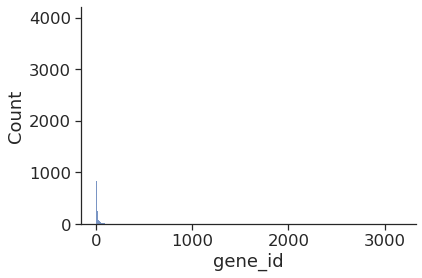

In [57]:
sns.histplot(df_unique_variants_sig['gene_id'].value_counts())

In [69]:
gene_id

variant_id            gene_id  tss_distance  prediction
10129017  chr6_139130968_T_C_b38  ENSG00000112379.8        969047           1

In [33]:
df = pd.concat(df_list)


In [34]:
df

auc_tss    auc_KR        proj    dist
0     0.666667  1.000000  aggregates  800000
1     1.000000  0.666667  aggregates  800000
2     1.000000  0.666667  aggregates  800000
3     1.000000  0.666667  aggregates  800000
4     1.000000  0.666667  aggregates  800000
...        ...       ...         ...     ...
2222  0.000000  0.500000   SRP071243  800000
2223  0.000000  0.500000   SRP071243  800000
2224  0.000000  0.250000   SRP071243  800000
2225  0.000000  0.000000   SRP071243  800000
2226  0.000000  0.500000   SRP071243  800000

[16824120 rows x 4 columns]

In [28]:
df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/stats/human_exclude_count_intra.txt', sep='\t')



df_seq_depth_exp = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/stats/human_project_network_details.tsv', sep='\t')
df_seq_depth_exp['species'] = "human"
df_seq_depth_exp['project'] = [x.strip() for x in df_seq_depth_exp['project']]
df_seq_depth_exp['experiment type'] = [x.strip() for x in df_seq_depth_exp['experiment type']]
df_seq_depth_exp['experiment type'] = [x if x=='Hi-C' else 'o' for x in df_seq_depth_exp['experiment type']]
    

In [29]:
dt = df_seq_depth.merge(df_seq_depth_exp, left_on='proj_id', right_on='project')

In [13]:
dj = df.groupby(['proj', 'dist'])[ 'auc_tss', 'auc_KR' ].mean().reset_index().merge(dt.groupby(['proj_id', 'experiment type'])['counts_intra'].sum().reset_index(), left_on=['proj'], right_on=['proj_id'])
#dj = df.groupby(['proj'])['auc_tss', 'auc_jac', 'auc_KR_ranked'].mean().reset_index().merge(df_seq_depth.groupby(['proj_id'])['counts_intra'].sum().reset_index(), left_on=['proj'], right_on=['proj_id'])


<ipython-input-13-8ba1d3801af7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dj = df.groupby(['proj', 'dist'])[ 'auc_tss', 'auc_KR' ].mean().reset_index().merge(dt.groupby(['proj_id', 'experiment type'])['counts_intra'].sum().reset_index(), left_on=['proj'], right_on=['proj_id'])


In [14]:
_df = df[df['proj'] == 'aggregates'].groupby(['proj', 'dist'])['auc_tss', 'auc_KR' ].mean().reset_index()


<ipython-input-14-59f77f27ecaa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df = df[df['proj'] == 'aggregates'].groupby(['proj', 'dist'])['auc_tss', 'auc_KR' ].mean().reset_index()


In [15]:
_df['counts_intra'] = dt['counts_intra'].sum()

In [16]:
_df['type'] = 'agg'

In [17]:
dj['type'] = 'ind'

In [18]:
dj = pd.concat([_df, dj[dj['proj'] != 'aggregates']])

In [19]:
import numpy as np
dj['log_con'] = [np.log10(x) for x in dj['counts_intra']]

In [20]:
_df['log_con'] = [np.log10(x) for x in _df['counts_intra']]

In [21]:
dj['auc_KR_g_log_con'] = [np.log10(x) for x in dj['auc_KR']]

In [22]:
dj

proj    dist   auc_tss    auc_KR  counts_intra type    proj_id  \
0    aggregates  800000  0.523893  0.592272  208492043801  agg        NaN   
0     DRP005173  800000  0.523893  0.521675     189959809  ind  DRP005173   
1     DRP005280  800000  0.523893  0.520248     361836452  ind  DRP005280   
2     ERP104251  800000  0.523893  0.543468     469216847  ind  ERP104251   
3     ERP107279  800000  0.523893  0.578088    2792708016  ind  ERP107279   
..          ...     ...       ...       ...           ...  ...        ...   
114   SRP264796  800000  0.523893  0.525850     524206007  ind  SRP264796   
115   SRP267107  800000  0.523893  0.568300    2591220918  ind  SRP267107   
116   SRP271101  800000  0.523893  0.552511    1012933301  ind  SRP271101   
117   SRP272124  800000  0.523893  0.517236      76782970  ind  SRP272124   
118   SRP274139  800000  0.523893  0.544403     429435501  ind  SRP274139   

    experiment type    log_con  auc_KR_g_log_con  
0               NaN  11.319089         -0.227479  
0                 o   8.278662         -0.282600  
1              Hi-C   8.558512         -0.283790  
2              Hi-C   8.671374         -0.264826  
3                 o   9.446026         -0.238006  
..              ...        ...               ...  
114               o   8.719502         -0.279138  
115               o   9.413504         -0.245422  
116            Hi-C   9.005581         -0.257659  
117               o   7.885265         -0.286312  
118            Hi-C   8.632898         -0.264079  

[120 rows x 10 columns]

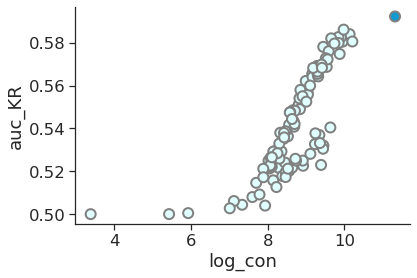

In [25]:
sns.set(style='white', font_scale=1.5)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)
import joypy
sc_bar = sns.scatterplot(data=dj[dj['dist']==800000], x='log_con', y='auc_KR', hue='type', style='type', palette=[ color_2, color_1],edgecolor="grey", s=100, linewidth=2, markers =  {"ind": "o", "agg": "o"})
#ax.set_ylim([15000, 25000])
sc_bar.legend().remove()
#ax = sns.scatterplot(data=dj[dj['dist']==0], x='log_con', y='auc_tss', color='#43EB14')
#sns.scatterplot(data=dj, x='log_con', y='auc_KR_ranked_g', hue='type', palette=[ 'black', 'darkorange'])
#ax.set_ylim([15000, 25000])
#ax.axhline(_df[_df['dist']==0]['auc_tss'].values, color='#43EB14')
sc_bar.legend().remove()

In [24]:
            color_1 = 'lightcyan'
            color_2 = '#129BD1'

In [82]:
sns.set(style='white', font_scale=1.5)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)
import joypy
sc_bar = sns.scatterplot(data=dj[dj['dist']==0], x='log_con', y='auc_KR', hue='type', style='type', palette=[ color_2, color_1],edgecolor="grey", s=100, linewidth=2, markers =  {"ind": "o", "agg": "o"})
#ax.set_ylim([15000, 25000])
sc_bar.legend().remove()
#ax = sns.scatterplot(data=dj[dj['dist']==0], x='log_con', y='auc_tss', color='#43EB14')
#sns.scatterplot(data=dj, x='log_con', y='auc_KR_ranked_g', hue='type', palette=[ 'black', 'darkorange'])
#ax.set_ylim([15000, 25000])
#ax.axhline(_df[_df['dist']==0]['auc_tss'].values, color='#43EB14')
sc_bar.legend().remove()

#plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/gtex_ind_vs_agg.pdf',
#            transparent=True)


NameError: name 'dj' is not defined

In [ ]:
        fig, ax = plt.subplots()
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)

        #axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, edgecolor='black', linewidth=0.4, size=2)
        axb = sns.boxplot(x='dist', y='auc_KR', data=dj[dj['type']=='ind'], ax=ax, color=color_1, orient="v", dodge=True, width=0.5)
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='dist', y='auc', data=dj[dj['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
        sns.swarmplot(x='dist', y='auc_KR', data=dj[dj['type']=='agg'], ax=ax, size=10, color=color_2, edgecolor='grey', linewidth=2,marker='o')
        sns.swarmplot(x='dist', y='auc_tss', data=dj[dj['type']=='agg'], ax=ax, size=10, color='orange', edgecolor='grey', linewidth=2,marker='o')
#        plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/gtex_ind_vs_agg_all_resol.pdf',
#            transparent=True)
        
        

In [540]:
df_counts = df[df['proj'] == 'aggregates'].groupby(['proj', 'resolution'])['auc_tss_g'].count().reset_index()



In [541]:
df_counts

proj  resolution  auc_tss_g
0  aggregates           0    1574194
1  aggregates         200     799459
2  aggregates         400     470401
3  aggregates         600     280726

<AxesSubplot:xlabel='resolution', ylabel='auc_tss_g'>

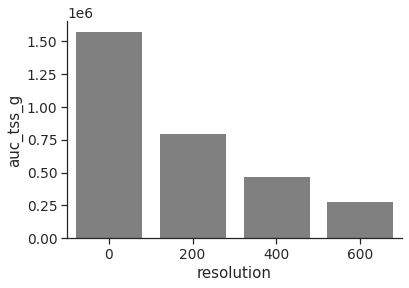

In [544]:
sns.barplot(data=df_counts, x='resolution', y='auc_tss_g', color='grey')
